### BTC AND ETH analysis

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests

In [11]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [12]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-12-21 18:44:08.417030')

In [13]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [14]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

Bitcoin:

In [15]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-12-21 19:00:00,16816,16829,16784,16791,34.902642,5.865701e+05
2022-12-21 20:00:00,16792,16805,16740,16755,71.529856,1.200325e+06
2022-12-21 21:00:00,16755,16780,16740,16780,114.188209,1.913974e+06
2022-12-21 22:00:00,16779,16796,16764,16790,92.589931,1.553701e+06
2022-12-21 23:00:00,16792,16792,16764,16769,41.349556,6.938576e+05


<AxesSubplot:xlabel='CloseTime'>

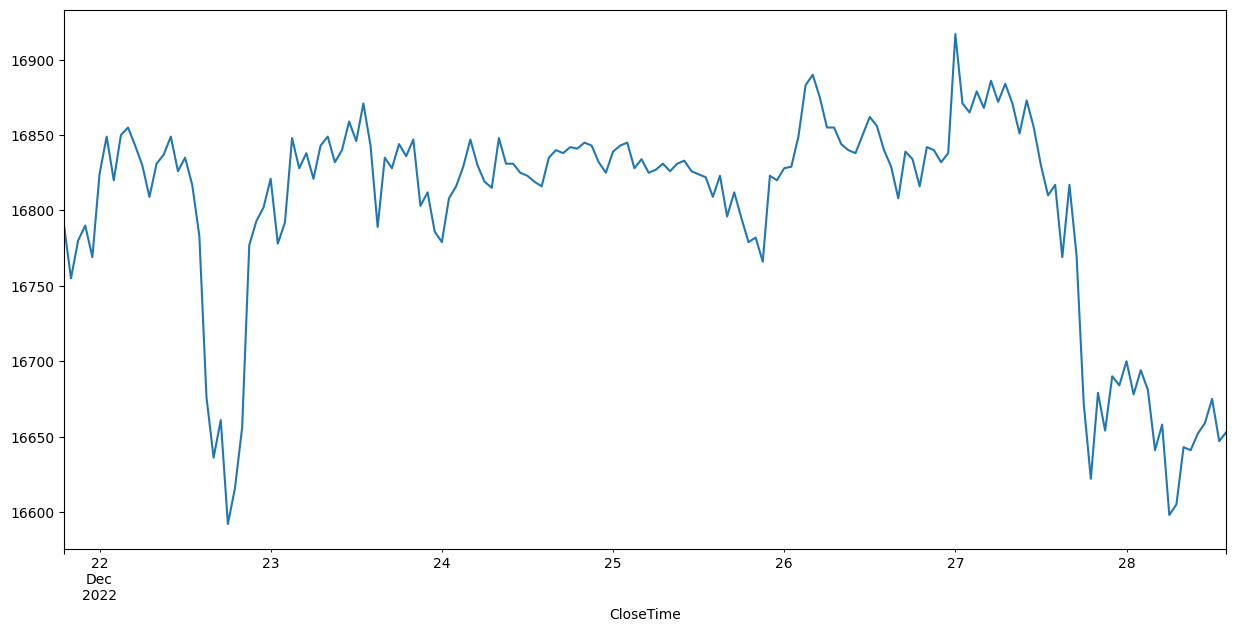

In [16]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ether:

In [17]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-12-21 19:00:00,1211.2,1212.7,1209.0,1209.7,105.185731,1.273627e+05
2022-12-21 20:00:00,1209.7,1211.3,1206.7,1208.5,232.685316,2.814786e+05
2022-12-21 21:00:00,1208.5,1209.8,1207.0,1209.6,736.405339,8.900570e+05
2022-12-21 22:00:00,1209.5,1212.0,1207.8,1211.8,875.084706,1.058822e+06
2022-12-21 23:00:00,1211.7,1211.9,1209.7,1209.8,72.430950,8.766915e+04


<AxesSubplot:xlabel='CloseTime'>

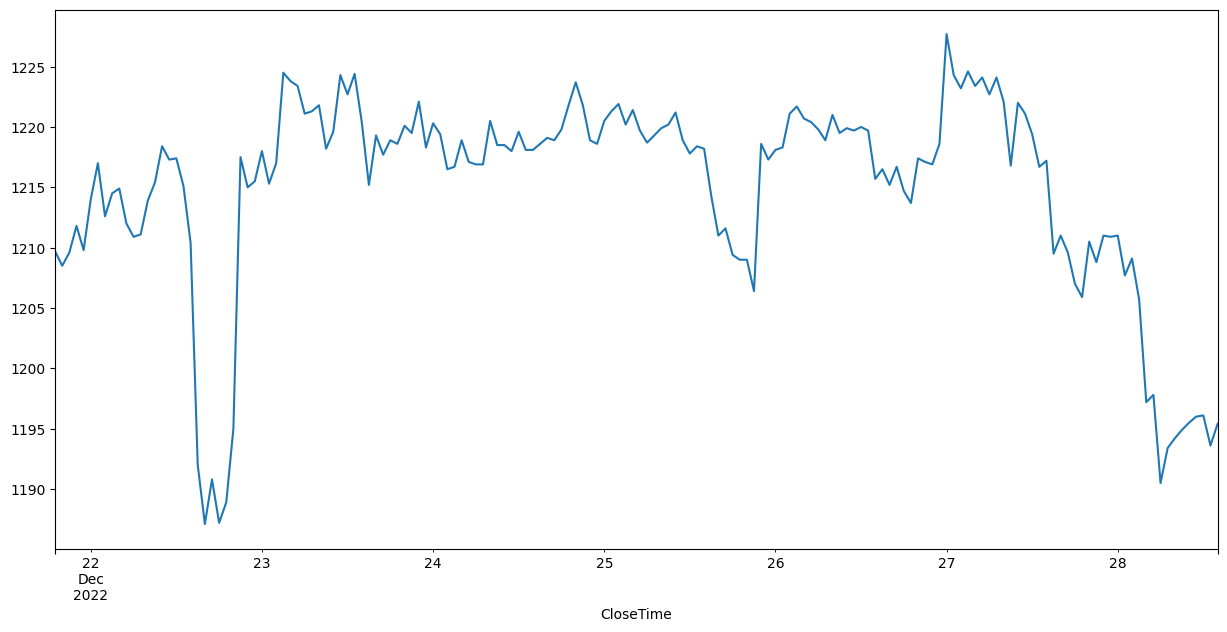

In [18]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [19]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-12-21 19:00:00,1211.2,1212.7,1209.0,1209.7,105.185731,1.273627e+05
2022-12-21 20:00:00,1209.7,1211.3,1206.7,1208.5,232.685316,2.814786e+05
2022-12-21 21:00:00,1208.5,1209.8,1207.0,1209.6,736.405339,8.900570e+05
2022-12-21 22:00:00,1209.5,1212.0,1207.8,1211.8,875.084706,1.058822e+06
2022-12-21 23:00:00,1211.7,1211.9,1209.7,1209.8,72.430950,8.766915e+04


Bonus: Dynamic plots with Bokeh

In [20]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [21]:
output_notebook()

Loading BokehJS ...

In [25]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\bokeh\models\plots.py:950: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the pandas package:

In [26]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [27]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [28]:
eth.to_excel(writer, sheet_name='Ether')

In [29]:
writer.save()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\934276808.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
